### 1. **Imports**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

- **`numpy`**: Used for numerical computations, especially for creating grids in visualization.
- **`matplotlib.pyplot`**: For plotting graphs and visualizations.
- **`pandas`**: For loading and handling datasets as DataFrames.
- **`sklearn.svm.SVC`**: The Support Vector Classifier from `scikit-learn`, which helps create and train SVM models.
- **`LabelEncoder`**: Encodes categorical labels into numerical format so the model can process them.
- **`accuracy_score`, `classification_report`, `confusion_matrix`**: Metrics for evaluating the model's performance.


### 2. **Loading the Data**

In [18]:
# Load the datasets
data = pd.read_csv('../train.csv')
test_data = pd.read_csv('../test.csv')
gender_submission = pd.read_csv('../gender_submission.csv')  # Load gender_submission.csv for actual test results

- `train.csv`: Training data containing features and target (survived status).
- `test.csv`: Test data used for prediction.
- `gender_submission.csv`: A sample submission file that includes the actual survival status of passengers for comparison purposes.

### 3. **Handling Missing Values**

In [19]:
# Handle missing values in the training and test data
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

- **Missing Data Imputation**:
  - For `Age`: Median value is used as a replacement, as it is less affected by outliers compared to the mean.
  - For `Embarked`: The mode (most common value) fills missing entries.
  - For `Fare`: Median is used to handle missing values.

### 4. **Label Encoding**

In [20]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [21]:
# Fit the encoder on the combined 'gender' column to handle both train and test data
combined_gender = pd.concat([data['gender'], test_data['gender']], axis=0)
label_encoder.fit(combined_gender)


LabelEncoder()

In [22]:
# Transform the 'gender' column for both datasets
data['gender'] = label_encoder.transform(data['gender'])
test_data['gender'] = label_encoder.transform(test_data['gender'])  # Same encoder


- **Label Encoding for `Gender`**:
  - `LabelEncoder` converts categorical data (`'male'`, `'female'`) into numerical format (e.g., `0` and `1`).
  - `fit` on the combined data ensures consistent encoding across training and test sets.
  - `transform` applies the transformation to each DataFrame.

### 5. **Encoding the `Embarked` Column**

In [23]:
# Initialize LabelEncoder for 'Embarked' column with handle_unknown='ignore' for unseen labels
embarked_encoder = LabelEncoder()
embarked_encoder.fit(data['Embarked'].dropna())  # Fit on the training data only

LabelEncoder()

In [24]:
# Transform the 'Embarked' column for both datasets with 'ignore' for unknown labels
data['Embarked'] = embarked_encoder.transform(data['Embarked'])
test_data['Embarked'] = embarked_encoder.transform(test_data['Embarked'])

- The `Embarked` column, which indicates the port of embarkation, is also encoded similarly to `Sex` using `LabelEncoder`.
- Fitting is done only on non-null values from the training set to avoid issues with missing values.

### 6. **Feature Selection**

In [25]:
# Select features for model training and testing
features = ['Age', 'Fare']
X_train = data[features]
y_train = data['Survived']
X_test = test_data[features]
y_test = gender_submission['Survived']  # Use actual 'Survived' from gender_submission.csv


- **Feature Selection**:
  - Only `Age` and `Fare` are used as features (`X_train` and `X_test`).
  - `y_train` is the target variable from the training data.
  - `y_test` from `gender_submission` serves as the true labels for the test set to evaluate model performance.


In [26]:
print('train data head')
data.head(5)

train data head


,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


### 7. **Creating and Training the SVM Model**

In [27]:
# Create and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

- **SVC with `kernel='linear'`**:
  - `kernel='linear'` means the algorithm looks for a linear decision boundary to separate classes.
  - **Support Vector Machine** works by finding the hyperplane that maximizes the margin between different classes.
- **Training (`fit`)**:
  - The model learns the relationships between features (`Age` and `Fare`) and the target (`Survived`).

### 8. **Making Predictions**

In [28]:
# Make predictions on the test data
y_pred = svm_model.predict(X_test)

- Predictions (`y_pred`) are made on the test data using the trained model.

### 9. **Evaluating the Model**

In [29]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.6411483253588517

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.91      0.76       266
           1       0.52      0.18      0.26       152

    accuracy                           0.64       418
   macro avg       0.59      0.54      0.51       418
weighted avg       0.61      0.64      0.58       418


Confusion Matrix:
 [[241  25]
 [125  27]]


- **Accuracy Score**: Measures the proportion of correctly classified instances out of total instances.
- **Classification Report**:
  - Provides metrics like precision, recall, and F1-score for each class.
- **Confusion Matrix**:
  - Shows true positives, true negatives, false positives, and false negatives in a matrix form, helping to visualize prediction performance.

### 10. **Visualization of the Decision Boundary**

In [30]:
# Visualization of the decision boundary
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [31]:
# Create a grid to evaluate the model
xx, yy = np.meshgrid(np.linspace(X_train['Age'].min(), X_train['Age'].max(), 100),
                     np.linspace(X_train['Fare'].min(), X_train['Fare'].max(), 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

c:\Users\Muskan Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


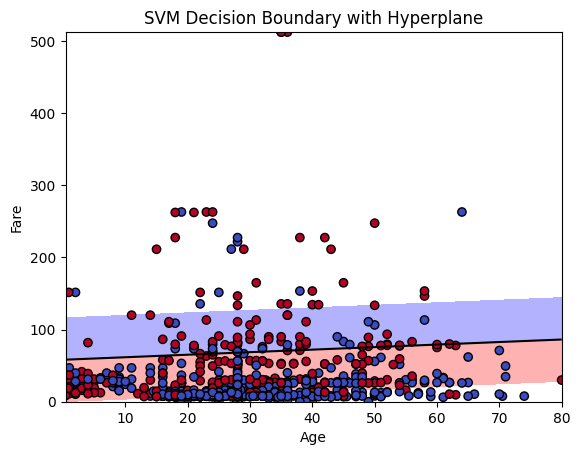

In [32]:
# Plot the hyperplane
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['red', 'blue', 'green'])
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])
# Plot the points
plt.scatter(X_train['Age'], X_train['Fare'], c=y_train, cmap='coolwarm', edgecolors='k')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('SVM Decision Boundary with Hyperplane')
plt.show()

- **Visualization**:
  - `np.meshgrid` creates a grid over the feature space.
  - `decision_function` calculates the margin distance for each point on the grid.
  - `plt.contourf` and `plt.contour` plot the decision boundary and margins.
- **Scatter Plot**:
  - Shows actual data points in the `Age` vs. `Fare` space, colored based on their class.

### **Understanding SVM in Depth**:
- **Support Vectors**: Data points that lie closest to the decision boundary; they influence the position and orientation of the hyperplane.
- **Hyperplane**: A line (in 2D) or a plane (in higher dimensions) that separates classes.
- **Kernel Trick**: Allows SVM to find a non-linear decision boundary by transforming data into a higher-dimensional space (not needed here as `kernel='linear'`).

**SVM Objective**:
- To maximize the margin between the decision boundary and the nearest data points from any class, ensuring better generalization.

This code is a complete workflow for training, predicting, and visualizing an SVM model using `Age` and `Fare` as features to classify passengers based on survival probability.